**Traffic Classification using Machine Learning**


by Sandeep Kundala (@skundal), Lalima Sharda (@lmsharda), Nita Radhakrishnan (@nradhak2)


Machine learning has been one of the hot and trending fields in computer science for quite some time. This programming paradigm is different from the classic progrommaing paradigm. How exactly is that? What makes Machine Learning so special that it is one of the most important skills any one should have who wants a career in technological world?


The answer is simple, machine learning is quite similar to human learning. Instead of designing solution using rules and problem, we train the machine with problems and solution. The machine learns and builds its own rules for classification or regression.

For long time, Machine Learning was only applied for automation and data analysis. But now, it can be applied for any application. Be it Google's self driving cars or voice assistants in our smart phones. AI-ML is everywhere. The only limitation to technlogy is only one factor and that is human imagination.

In this problem statement, we present the scenario on how machine learning can be used in classifying traffic which can be used for providing quality of service depending upon the type of traffic i.e., routing the packets depending upon its type.


***Step 1:***Import all necessary packages. Incase you are using online platforms like Google Colab.

In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install xgboost

# import all necessary packages
import matplotlib.pyplot as plt # plotting
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn import metrics



***Step2:*** Provide credentials for your google account by clicking the link and copy the ID and paste in the text field.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

***Step3:*** The below is the link of the dataset. Get the dataset and load first 50000 rows. We are not working with the entire dataset for this example is because this code is being executed on the laptop and there might be severe performance impacts. If you are using any cloud services like GCP or AWS, download the dataset and work with the entire dataset.

In [3]:
link = 'https://drive.google.com/open?id=1ts1QJMNy6vuuVAu-Lq-n_lAcVzFb93FN'
fluff, id = link.split('=')
print(id)

1ts1QJMNy6vuuVAu-Lq-n_lAcVzFb93FN


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('NIMS-normalized.arff') 

In [0]:
from scipy.io import arff

data = arff.loadarff('NIMS-normalized.arff')
df = pd.DataFrame(data[0])


In [6]:
df = df[:50000]
labels = []
for i in df['class'].unique().tolist():
    labels.append(str(i))
df.drop(['class'], axis = 1)
df['Class_Factor'] = df['class'].factorize()[0]
df.head()

,min_fpktl,mean_fpktl,max_fpktl,std_fpktl,min_bpktl,mean_bpktl,max_bpktl,std_bpktl,min_fiat,mean_fiat,max_fiat,std_fiat,min_biat,mean_biat,max_biat,std_biat,duration,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,class,Class_Factor
0,0.000000,0.000593,0.000122,0.000367,0.064062,0.032667,0.045582,0.018614,0.000212,0.022841,0.024289,0.034299,0.000106,0.011792,0.002833,0.011884,0.002152,0.0,0.000012,0.000000,0.000032,0.000002,b'TELNET',0
1,0.000000,0.000711,0.000488,0.000490,0.064062,0.040667,0.039584,0.017580,0.000191,0.012860,0.021976,0.032089,0.000124,0.009288,0.006224,0.019656,0.000071,0.0,0.000012,0.000000,0.000034,0.000003,b'FTP',1
2,0.020202,0.022048,0.025140,0.025340,0.082812,0.594000,0.600160,0.627715,0.000089,0.010255,0.015281,0.022949,0.000347,0.009130,0.004354,0.016111,0.002042,0.0,0.000015,0.000002,0.000030,0.000039,b'HTTP',2
3,0.026936,0.002608,0.000976,0.000490,0.120313,0.114000,0.085566,0.066184,0.138378,0.138378,0.038563,0.000000,0.003322,0.003322,0.000276,0.000000,0.023441,1.0,0.000003,0.000000,0.000009,0.000002,b'DNS',3
4,0.102694,0.007231,0.003234,0.000000,0.306250,0.275333,0.253898,0.118925,0.000899,0.038567,0.070267,0.126904,0.001102,0.037950,0.020662,0.093575,0.078102,1.0,0.000022,0.000002,0.000045,0.000027,b'lime',4


***Step 4:*** Check correlation between the target column with all other columns to check if there are any column which issimilar to the target column. Also, this correlation can be useful to take out few columns for consideration in training the models. Here, since the number of columns are less in number, we have not omitted any columns. However, if you would like to remove less correlated columns from being considered, you can create a list of column names you would like to consider for the training and then reindex the dataframe.

In [7]:
corr_matrix = abs(df.corr(method='pearson'))
y=corr_matrix['Class_Factor'].sort_values(ascending=False)
print('Correlation between column X and column \'Class Factor\'\n',y)

Correlation between column X and column 'Class Factor'
 Class_Factor      1.000000
max_fpktl         0.874487
std_fpktl         0.874335
mean_fpktl        0.874326
total_fvolume     0.680311
duration          0.553554
proto             0.498867
max_biat          0.460839
total_bpackets    0.449449
std_biat          0.369923
max_fiat          0.353472
total_fpackets    0.352143
total_bvolume     0.301724
max_bpktl         0.291694
std_fiat          0.263235
min_fpktl         0.150464
mean_biat         0.130406
mean_bpktl        0.072702
min_biat          0.065878
std_bpktl         0.041545
min_fiat          0.031310
min_bpktl         0.023323
mean_fiat         0.001940
Name: Class_Factor, dtype: float64


***Step 5:*** Split the dataset into training and testing. Usually it is considered good to follow 80:20 rule i.e., 80% training and 20% testing.

In [8]:
colNames = df.columns.values
X = df.reindex(columns=colNames[:22])
Y = df['Class_Factor']
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, Y, df.index, test_size=0.2, random_state=0)
print('Data size of training set:',len(X_train))
print('Data size of testing set:',len(X_test))

Data size of training set: 40000
Data size of testing set: 10000


***Step 6:*** Train the dataset on different models and get the accuracy. The one which would have the highest accuracy can be treated as the champion model and can be used to deploy it on the routing devices.

In [9]:
from sklearn.svm import LinearSVC
#Linear SVC
lsvc = LinearSVC()
y_pred_LSVC = lsvc.fit(X_train, y_train).predict(X_test)
best_model = lsvc.fit(X_train, y_train)
lsvc_accr = metrics.accuracy_score(y_test,y_pred_LSVC)*100
best_accr = lsvc_accr
print("Accuracy of SVC: ", lsvc_accr)

Accuracy of SVC:  98.27


In [10]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
y_pred_knn = knn.fit(X_train, y_train).predict(X_test)
knn_accr = metrics.accuracy_score(y_test, y_pred_knn)*100
print("Accuracy of KNN:", knn_accr)


Accuracy of KNN: 99.99


In [11]:
#DTC
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
y_pred_DTC_gini = clf_gini.fit(X_train, y_train).predict(X_test)
y_pred_DTC_entropy = clf_entropy.fit(X_train, y_train).predict(X_test)
dtc_gini_accr = metrics.accuracy_score(y_test,y_pred_DTC_gini)*100
dtc_entropy_accr = metrics.accuracy_score(y_test,y_pred_DTC_entropy)*100
print("Accuracy of DTC (gini): ", dtc_gini_accr)
print("Accuracy of DTC (entropy):", dtc_entropy_accr)


Accuracy of DTC (gini):  99.97
Accuracy of DTC (entropy): 99.98


In [13]:
#Multinomial NB
from sklearn.naive_bayes import MultinomialNB
mnb_model=MultinomialNB()
y_pred_mnb=mnb_model.fit(X_train,y_train).predict(X_test)
mnb_accr = metrics.accuracy_score(y_test,y_pred_mnb)*100
print("Accuracy of Multinomial Naive Bayes:",mnb_accr)


#Bernoulli NB
from sklearn.naive_bayes import BernoulliNB
bnb_model=BernoulliNB()
y_pred_bnb=bnb_model.fit(X_train,y_train).predict(X_test)
bnb_accr = metrics.accuracy_score(y_test,y_pred_bnb)*100
print("Accuracy of Bernoulli Naive Bayes:",bnb_accr)

#Gaussian NB
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
y_pred_gnb=gnb_model.fit(X_train,y_train).predict(X_test)
gnb_accr = metrics.accuracy_score(y_test,y_pred_gnb)*100
print("Accuracy of Gaussian Naive Bayes:",gnb_accr)

Accuracy of Multinomial Naive Bayes: 97.78999999999999
Accuracy of Bernoulli Naive Bayes: 84.83000000000001
Accuracy of Gaussian Naive Bayes: 86.22


In [14]:
#ADB
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=200, learning_rate=1)
#Train Adaboost Classifer
y_pred_ada = adb.fit(X_train, y_train).predict(X_test)
adb_accr = metrics.accuracy_score(y_test, y_pred_ada)*100
print("Accuracy of AdaBoost Classifer:",adb_accr)

Accuracy of AdaBoost Classifer: 97.78


In [15]:
#XGB
from xgboost import XGBClassifier
xgb = XGBClassifier()
y_pred_xgb = xgb.fit(X_train, y_train).predict(X_test)
xgb_accr = metrics.accuracy_score(y_test, y_pred_xgb)*100
print("Accuracy of XGBoost Classifer:",xgb_accr)

Accuracy of XGBoost Classifer: 99.98


In [16]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
y_pred_rfc=rfc.fit(X_train,y_train).predict(X_test)
rfc_accr = metrics.accuracy_score(y_test, y_pred_rfc)*100
print("Accuracy of Random Forest Classifier:",rfc_accr)

Accuracy of Random Forest Classifier: 99.99


In [20]:
if(best_accr<knn_accr):
  best_accr = knn_accr
  best_model = knn.fit(X_train, y_train)
if(best_accr<dtc_gini_accr):
  best_accr = dtc_gini_accr
  best_model = clf_gini.fit(X_train, y_train)
elif(best_accr<dtc_entropy_accr):
  best_accr = dtc_entropy_accr
  best_model = clf_entropy.fit(X_train, y_train)
elif(best_accr<mnb_accr):
  best_accr = mnb_accr
  best_model = mnb_model.fit(X_train, y_train)
elif(best_accr<bnb_accr):
  best_accr = bnb_accr
  best_model = bnb_model.fit(X_train, y_train)
elif(best_accr<gnb_accr):
  best_accr = gnb_accr
  best_model = gnb_model.fit(X_train, y_train)
elif(best_accr<adb_accr):
  best_accr = mnb_accr
  best_model = mnb_model.fit(X_train, y_train)
elif(best_accr<xgb_accr):
  best_accr = xgb_accr
  best_model = xgb_model.fit(X_train, y_train)
elif(best_accr<rfc_accr):
  best_accr = rfc_accr
  best_model = rfc_model.fit(X_train, y_train)
print("Best Model: ", best_model,"\nAccuracy: ",best_accr)

import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

Best Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 
Accuracy:  99.99


['finalized_model.sav']

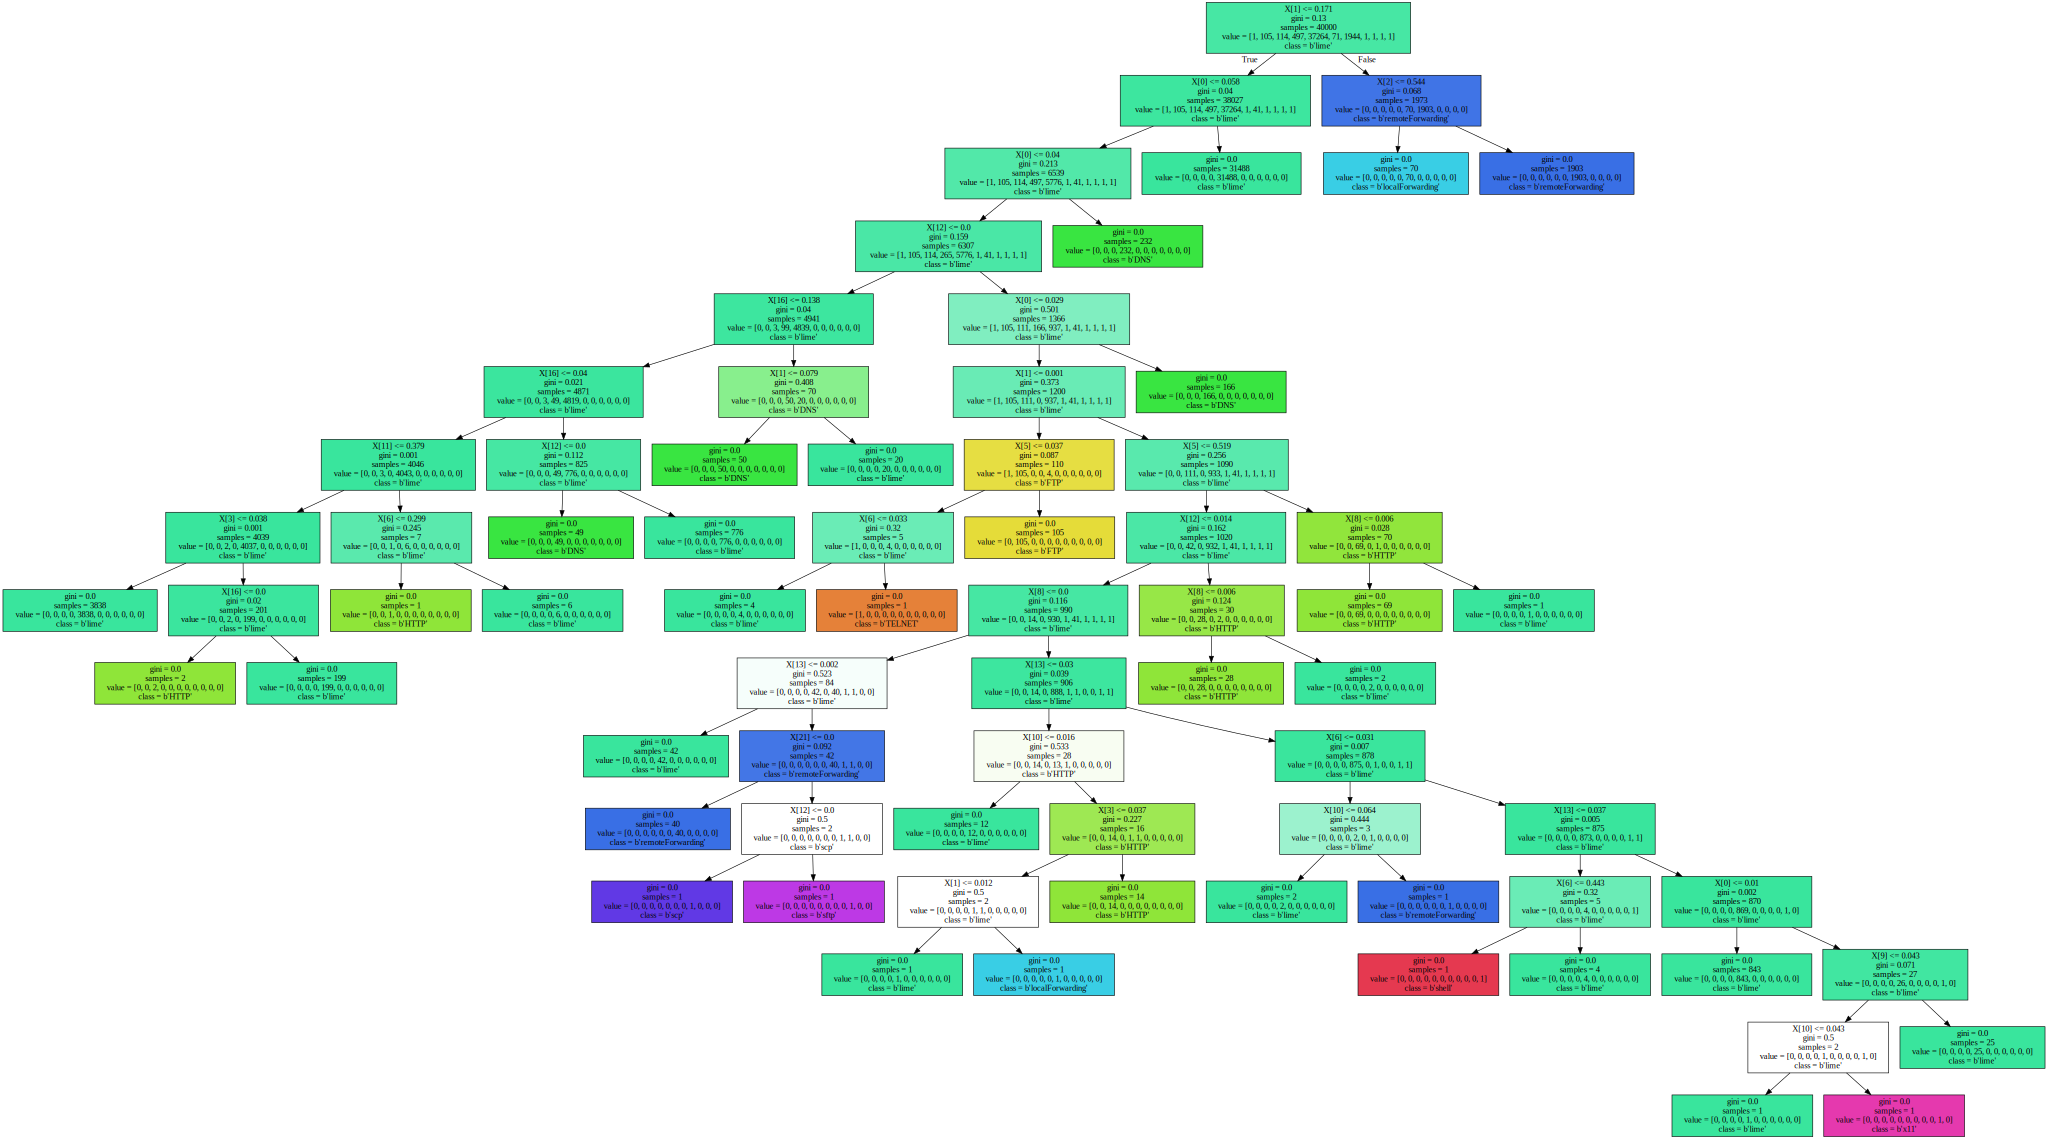

In [21]:
# DTC Gini Visualization
plt.rcParams['figure.figsize'] = [20,20]
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(clf_gini.fit(X_train, y_train), out_file=None, filled = True, class_names=labels))
display(SVG(graph.pipe(format='svg')))

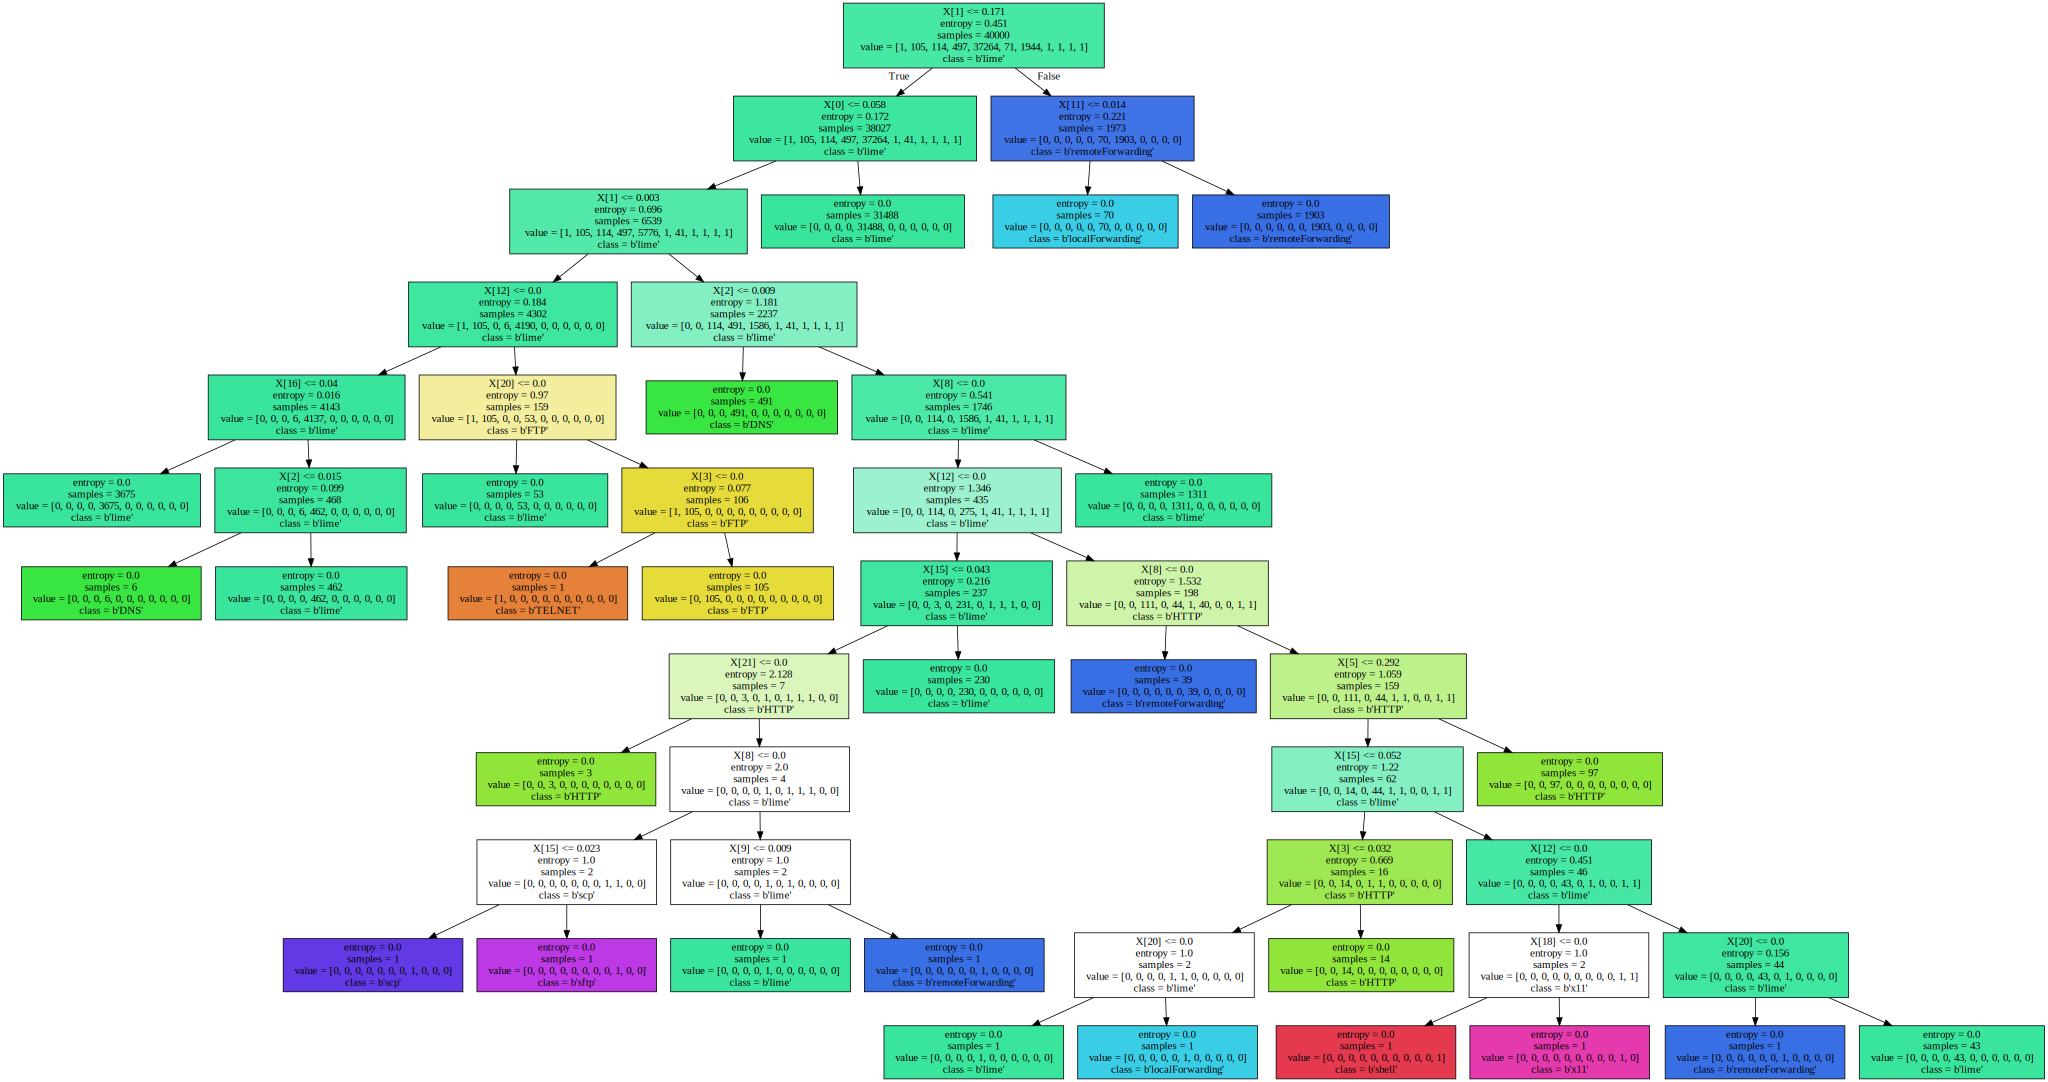

In [22]:
# DTC Entropy
graph = Source(tree.export_graphviz(clf_entropy.fit(X_train, y_train), out_file=None, filled = True, class_names=labels))
display(SVG(graph.pipe(format='svg')))